In [1]:
import cv2
import PIL
import copy
import math
import numpy as np
from io import BytesIO
from IPython.display import Image, display

In [2]:
import scipy.misc
import csv,gc
import matplotlib
from PIL import Image
from numpy import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

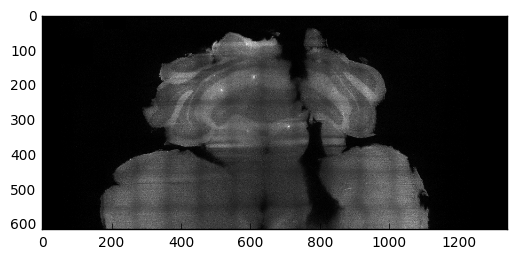

In [4]:
im = array(Image.open('aut1367_slice.png'))
plt.imshow(np.asarray(im))

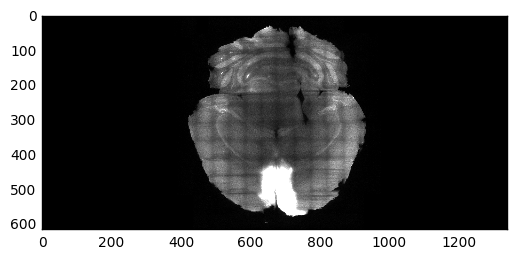

In [6]:
im2 = array(Image.open('aut1367.png'))
plt.imshow(np.asarray(im2))

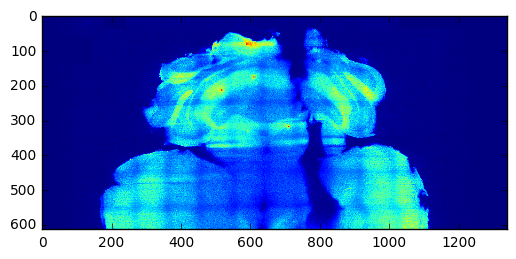

In [7]:
im = array(Image.open('aut1367_slice.png').convert('L'))
plt.imshow(np.asarray(im))

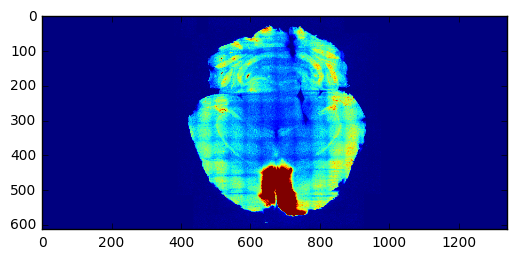

In [26]:
im2 = array(Image.open('aut1367.png').convert('L'))
plt.imshow(np.asarray(im2))

In [8]:
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(im)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=im)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=im)

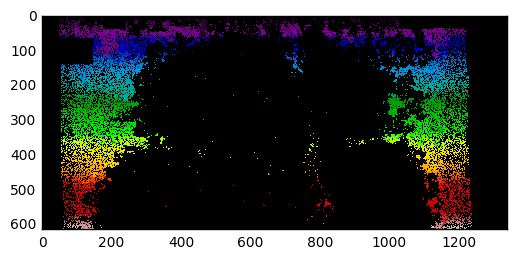

In [9]:
plt.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')

In [27]:
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(im2)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=im2)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=im2)

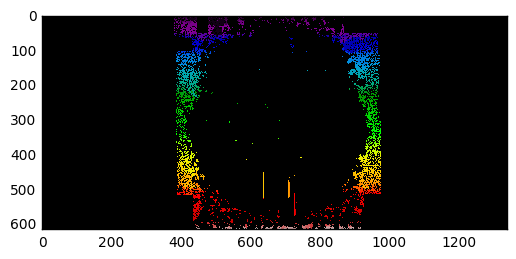

In [28]:
plt.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')

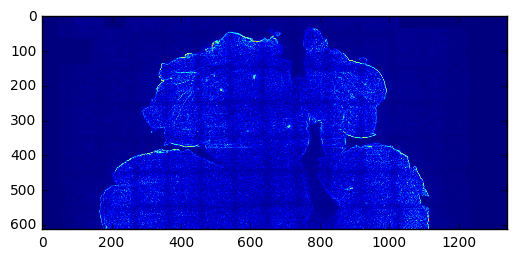

In [10]:
from skimage import data, io, filters

edges = filters.sobel(np.asarray(im))
plt.imshow(edges)

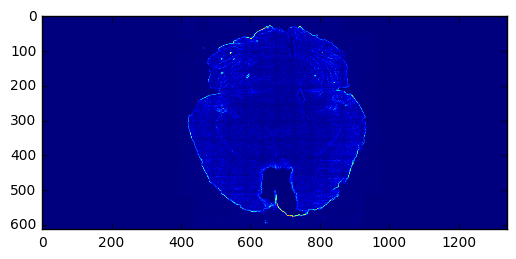

In [29]:
from skimage import data, io, filters

edges = filters.sobel(np.asarray(im2))
plt.imshow(edges)

41


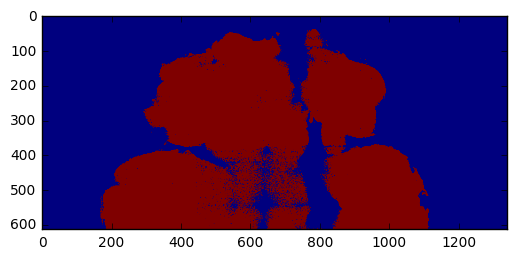

In [13]:
from skimage.filters import threshold_otsu
inArray = np.asarray(im)

thresh = threshold_otsu(inArray)
print thresh

binary = inArray > thresh
# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
plt.imshow(binary)

55


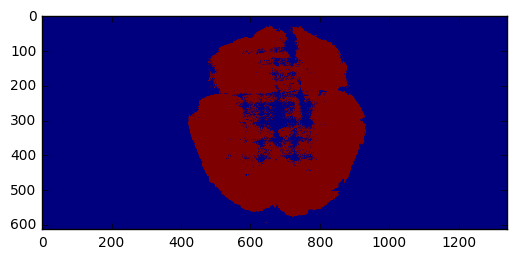

In [30]:
from skimage.filters import threshold_otsu
inArray2 = np.asarray(im2)

thresh = threshold_otsu(inArray2)
print thresh

binary = inArray2 > thresh
# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
plt.imshow(binary)

(array([  2.18717000e+05,   6.34460000e+04,   5.28800000e+04,
          3.87810000e+04,   2.67460000e+04,   1.79440000e+04,
          1.54250000e+04,   6.21900000e+03,   4.36700000e+03,
          3.04200000e+03,   2.17700000e+03,   1.69800000e+03,
          2.02000000e+03,   1.06200000e+03,   9.21000000e+02,
          0.00000000e+00,   9.44000000e+02,   8.76000000e+02,
          7.94000000e+02,   8.21000000e+02,   1.15500000e+03,
          7.16000000e+02,   7.49000000e+02,   7.30000000e+02,
          7.34000000e+02,   7.59000000e+02,   1.17700000e+03,
          8.44000000e+02,   8.81000000e+02,   9.05000000e+02,
          0.00000000e+00,   9.45000000e+02,   1.00800000e+03,
          1.63200000e+03,   1.18000000e+03,   1.36600000e+03,
          1.50300000e+03,   1.70900000e+03,   1.87400000e+03,
          1.93900000e+03,   3.36200000e+03,   2.49900000e+03,
          2.66100000e+03,   2.96600000e+03,   3.11000000e+03,
          0.00000000e+00,   3.31200000e+03,   5.18200000e+03,
        

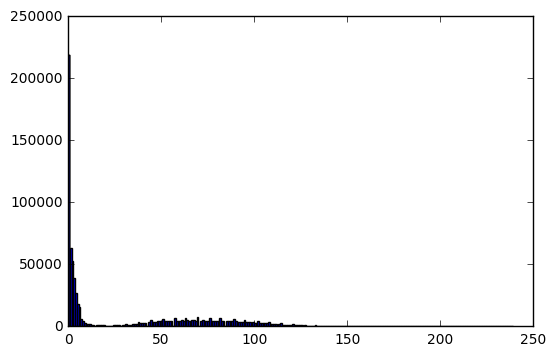

In [14]:
plt.hist(inArray.ravel(), bins=256)

(array([  5.17762000e+05,   2.46220000e+04,   2.09290000e+04,
          1.61210000e+04,   1.16470000e+04,   8.26200000e+03,
          7.41000000e+03,   3.03200000e+03,   1.96700000e+03,
          1.36300000e+03,   8.90000000e+02,   6.88000000e+02,
          7.79000000e+02,   3.53000000e+02,   3.05000000e+02,
          2.55000000e+02,   2.28000000e+02,   2.26000000e+02,
          2.09000000e+02,   2.65000000e+02,   1.55000000e+02,
          1.62000000e+02,   1.81000000e+02,   1.44000000e+02,
          1.75000000e+02,   2.33000000e+02,   1.67000000e+02,
          1.80000000e+02,   1.73000000e+02,   1.97000000e+02,
          1.95000000e+02,   3.36000000e+02,   2.73000000e+02,
          3.29000000e+02,   3.15000000e+02,   3.98000000e+02,
          4.13000000e+02,   4.35000000e+02,   7.77000000e+02,
          6.51000000e+02,   6.41000000e+02,   7.68000000e+02,
          8.22000000e+02,   9.24000000e+02,   1.55400000e+03,
          1.03800000e+03,   1.23100000e+03,   1.19000000e+03,
        

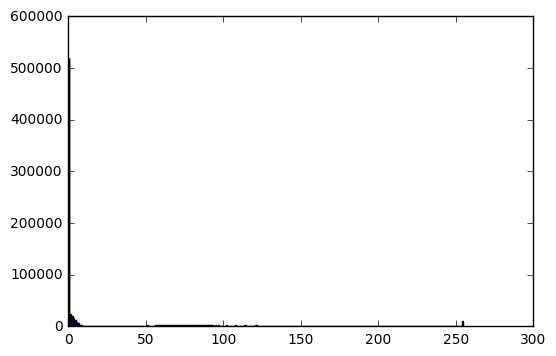

In [31]:
plt.hist(inArray2.ravel(), bins=256)

In [16]:
im = cv2.imread('aut1367_slice.png')
im2 = im
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [17]:
cv2.drawContours(im, contours, -1, (255,0,0), 3)

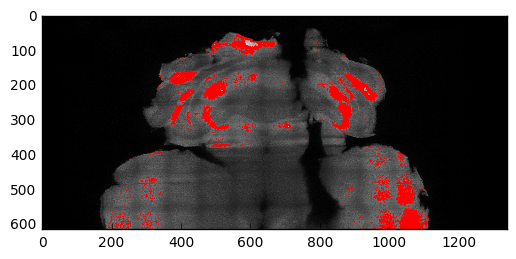

In [18]:
plt.imshow(im)

In [32]:
im = cv2.imread('aut1367.png')
im2 = im
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [33]:
cv2.drawContours(im, contours, -1, (255,0,0), 3)

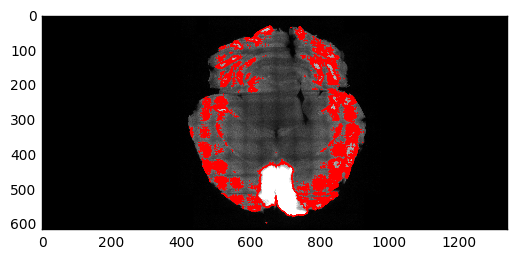

In [34]:
plt.imshow(im)

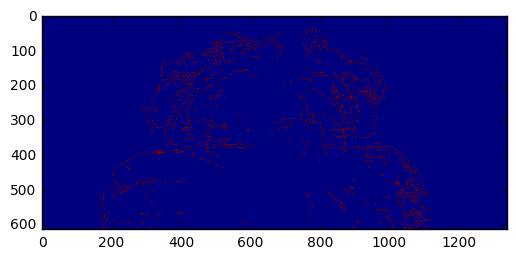

In [39]:
from skimage.feature import canny
edges = canny(inArray/255.)
plt.imshow(edges)

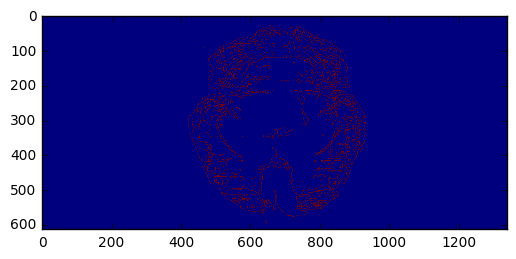

In [36]:
from skimage.feature import canny
edges = canny(inArray2/255.)
plt.imshow(edges)

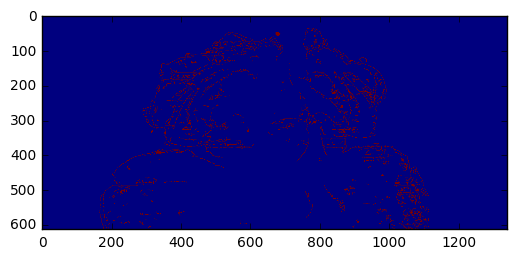

In [40]:
from scipy import ndimage as ndi
fill = ndi.binary_fill_holes(edges)
plt.imshow(fill)

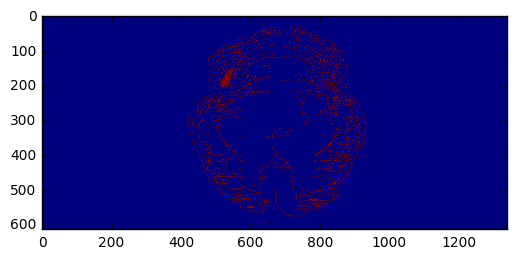

In [38]:
from scipy import ndimage as ndi
fill = ndi.binary_fill_holes(edges)
plt.imshow(fill)

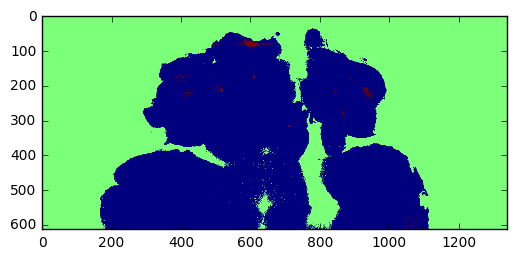

In [51]:
threed = np.zeros_like(inArray)
threed[inArray < 30] = 1
threed[inArray > 150] = 2

plt.imshow(threed)

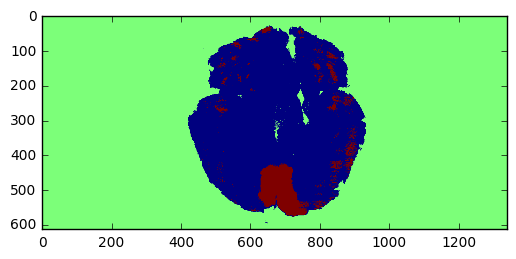

In [44]:
threed = np.zeros_like(inArray2)
threed[inArray2 < 30] = 1
threed[inArray2 > 150] = 2

plt.imshow(threed)

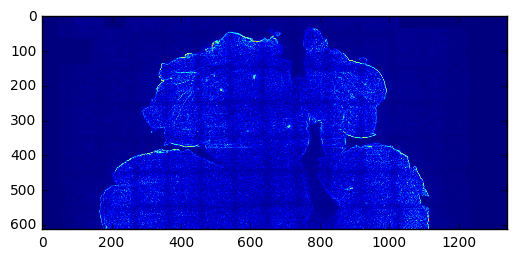

In [52]:
from skimage.filters import sobel
elevation_map = sobel(inArray)
plt.imshow(elevation_map)

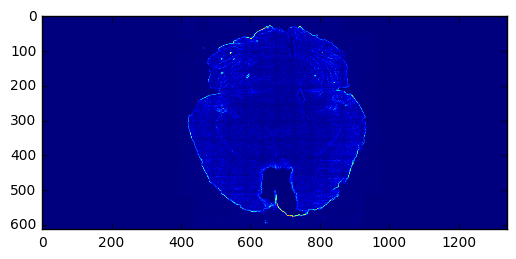

In [47]:
from skimage.filters import sobel
elevation_map = sobel(inArray2)
plt.imshow(elevation_map)

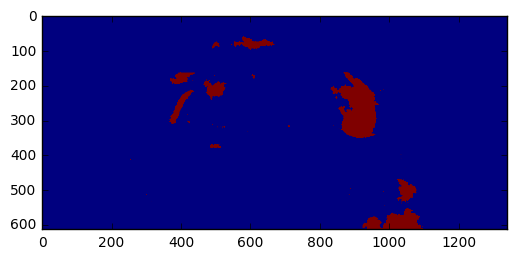

In [53]:
segmentation = watershed(elevation_map, threed)
plt.imshow(segmentation)

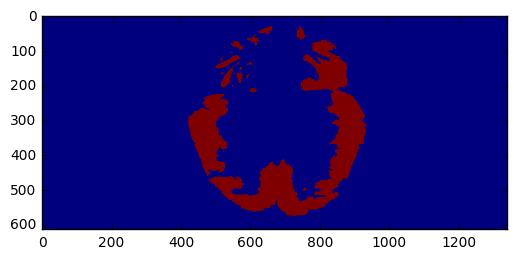

In [50]:
segmentation = watershed(elevation_map, threed)
plt.imshow(segmentation)